In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Inputs

In [2]:
def P(a, b):  # z**2 - 1
    return a**2 -b**2 - 1, 2*a*b 

def dP(a, b):  # 2z
    return 2*a, 2*b

roots = [
    [1, 0],
    [-1, 0]
]

# One Iteration

In [3]:
def one_iteration(a, b, P: callable = P, dP: callable = dP):
    Pa, Pb = P(a, b)
    dPa, dPb = dP(a, b)
    den = dPa**2 + dPb**2
    a_ = a - Pa*dPa/den - Pb*dPb/den
    b_ = b - Pb*dPa/den + Pa*dPb/den
    return a_, b_

# Calculations

In [8]:
N = 100
xy_upper_lim = 2
xy_lower_lim = -2
a = np.tile(np.linspace(xy_lower_lim, xy_upper_lim, N).tolist(), (N, 1))
b = np.tile(np.linspace(xy_lower_lim, xy_upper_lim, N).tolist(), (N, 1)).T

In [9]:
for i in tqdm(range(5)):
    a, b = one_iteration(a, b)

100%|██████████| 5/5 [00:00<00:00, 1668.91it/s]


# Results

In [13]:
a, b = one_iteration(a, b)

100%|██████████| 100/100 [00:09<00:00, 10.56it/s]


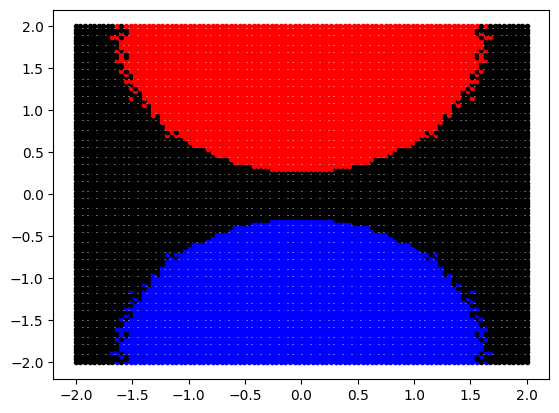

In [14]:
s = np.linspace(xy_lower_lim, xy_upper_lim, N)
for i in tqdm(range(N)):
    for j in range(N):
        if a[i, j] == 1 and b[i, j] == 0:
            plt.plot(s[i], s[j], 'r.')
        elif a[i, j] == -1 and b[i, j] == 0:
            plt.plot(s[i], s[j], 'b.')
        else:
            plt.plot(s[i], s[j], 'k.')